# 데이터 로딩

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data[:,2:]  # 군집의 결과를 2차원 평면으로 시각화를 위해 2개의 특성값만 선택
y = iris.target

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

# 최적의 K 찾기
- KMeans 객체의 inertia 속성 이용
>- inertia: 각 데이터에서 할당된 클러스터의 중심까지의 제곱거리 합계 

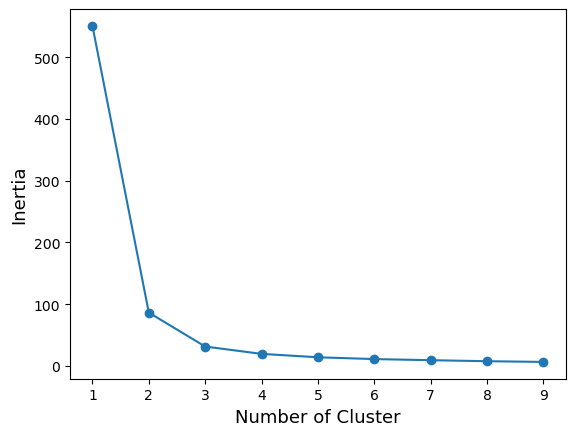

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_arr = []  # y 좌표
k_range = range(1, 10)

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=20)
    kmean.fit(x)
    inertia = kmean.inertia_
    inertia_arr.append(inertia)

# Elbow Method 그래프 그리기
plt.plot(k_range, inertia_arr, '-o')
plt.xlabel('Number of Cluster', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

# K-Means Clustering 하기

cluster-0: 52
cluster-0: 50
cluster-0: 48


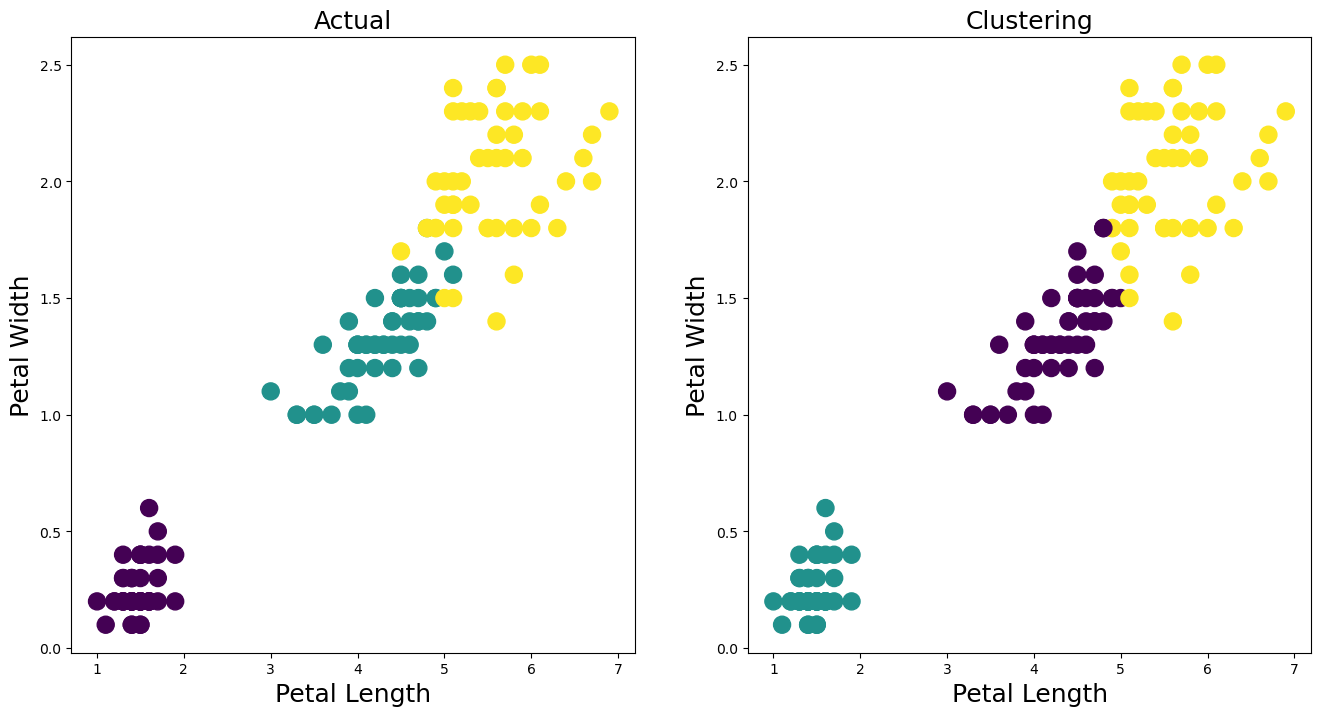

In [14]:
kmeans = KMeans(n_clusters=3, random_state=10)   # 3개 군집으로 분리하겠음
kmeans.fit(x)  # 비지도학습이기 때문에 독립변수 x만 넣어 학습

cluster_num = kmeans.labels_   # 데이터마다의 할당된 군집 번호 확인
# print(cluster_num[:10])
print('cluster-0:', len(cluster_num[cluster_num==0]))
print('cluster-0:', len(cluster_num[cluster_num==1]))
print('cluster-0:', len(cluster_num[cluster_num==2]))

fig, axes = plt.subplots(1, 2, figsize= (16,8))


# 붓꽃 정답 그래프
axes[0].scatter(x[:,0], x[:,1], c=y, s=150)  # x는 이미 속성 4개 중 2개의 속성 가져왔으므로 0, 1로 지정 
# c: 색깔(각 테이터의 클래스 값 = 0, 1, 2)으로 색 지정, s: 산점도 크기
axes[0].set_xlabel('Petal Length', fontsize=18)
axes[0].set_ylabel('Petal Width', fontsize=18)
axes[0].set_title('Actual', fontsize=18)


# K-means Clustering을 통해 군집된 결과를 그린 그래프 
axes[1].scatter(x[:,0], x[:,1], c=cluster_num, s=150) # c - 군집별 색상 지정
axes[1].set_xlabel('Petal Length', fontsize=18)
axes[1].set_ylabel('Petal Width', fontsize=18)
axes[1].set_title('Clustering', fontsize=18)
plt.show()

- Actual = 두 개의 품종은 일부 비슷한 값을 갖는 데이터 有, 1개만 상이
- Clustering = 150 데이터를 군집 분석에 따라 군집별 할당된 색으로 그래프 생성
>- Actual에 두 개의 오분류 데이터가 군집 분석에 따라 분리됨

# 군집 평가

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Cluster'] = cluster_num

# iris의 모든 개별 데이터에 대한 실루엣 계수 산출
score_sample = silhouette_samples(iris.data, kmeans.labels_)
print(score_sample.shape)
iris_df['silhouette_coef'] = score_sample

average_score = silhouette_score(iris.data, kmeans.labels_)
print(f'실루엣 계수:{average_score:.3f}')

group_by_cluster = iris_df.groupby('Cluster')['silhouette_coef'].mean()
print(group_by_cluster)
display(iris_df.head())

(150,)
실루엣 계수:0.522
Cluster
0    0.416037
1    0.790033
2    0.358131
Name: silhouette_coef, dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,silhouette_coef
0,5.1,3.5,1.4,0.2,1,0.846985
1,4.9,3.0,1.4,0.2,1,0.807886
2,4.7,3.2,1.3,0.2,1,0.822747
3,4.6,3.1,1.5,0.2,1,0.797255
4,5.0,3.6,1.4,0.2,1,0.843342


# 실루엣 계수를 이용한 군집 개수 최적화

In [23]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 개수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 개수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 개수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

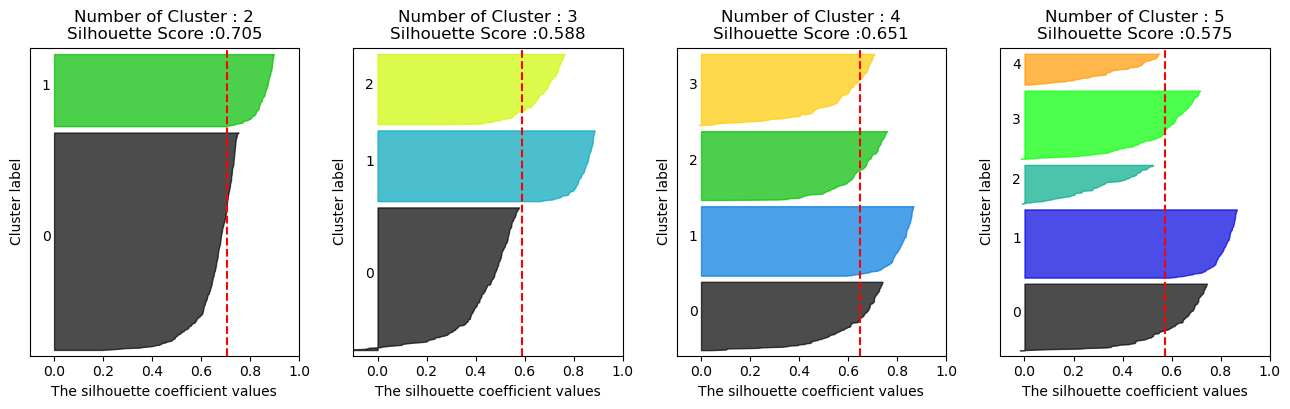

In [24]:
import numpy as np
# make_blobs = clustering을 위한 임의의 데이터셋 생성
from sklearn.datasets import make_blobs

# 4개의 클러스터 중심의 500개 2차원 데이터셋 생성
x, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, shuffle=True, random_state=1)
visualize_silhouette([2,3,4,5], x)   # visualize_silhouette(cluster_lists, X_features)

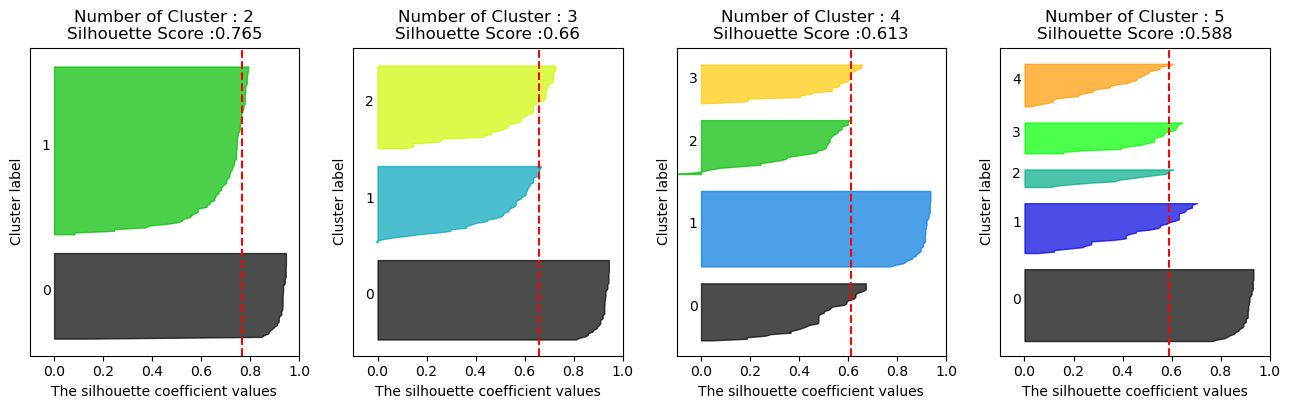

In [27]:
# 붓꽃 데이터 Silhouette 분석, 빨간 선 = 평균
visualize_silhouette([2,3,4,5], x)

# [실습] 군집분석을 위한 온라인 쇼핑몰 구매고객 분석

## 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np

retail = pd.read_excel('./dataset/online_retail.xlsx')
print(retail.shape)

In [ ]:
display(retail.head())

In [ ]:
print(retail.info())

In [85]:
print(retail['Country'].value_counts())

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76


## 데이터 전처리

### 결측치 확인 및 제거

In [86]:
print(retail.isna().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [87]:
retail = retail.dropna()

In [88]:
print(retail.shape)

(417534, 8)


### 데이터 타입 변경

In [89]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB
None


- 고객 번호를 정수 타입으로 변경 

In [90]:
retail['Customer ID'] = retail['Customer ID'].astype(int)

- 송장 번호 정수 타입으로 변경
>- 취소된 구매건에 대해서는 'C'가 앞 글자로 붙어 있음
>- 취소 주문 데이터 삭제 필요

In [91]:
retail['Invoice'] = retail['Invoice'].astype(int)

ValueError: invalid literal for int() with base 10: 'C489449'

### 취소 주문 데이터 삭제

In [92]:
print(retail['Invoice'].str.startswith('C').sum())

9839


In [93]:
print((retail['Quantity'] <= 0).sum())

9839


In [94]:
del_index = retail[retail['Quantity'] <= 0].index
# print(del_index[:5])
retail.drop(del_index, inplace=True)

## 분석용 데이터 준비

### 분석 데이터 탐색

In [95]:
# Products: 총 상품 개수
# Transaction: 총 거래 건수
# Customers: 총 고객 수
retail_info = pd.DataFrame({'Products':len(retail['StockCode'].value_counts()),
                           'Transaction':len(retail['Invoice'].value_counts()),
                           'Customers':len(retail['Customer ID'].value_counts()),
                           'Countries':len(retail['Country'].value_counts())}, index=['Count'])
print(retail_info)

       Products  Transaction  Customers  Countries
Count      4017        19215       4314         37


### 분석용 데이터 생성
- 고객별 타겟 마케팅을 위한 고객의 주문 횟수, 주문 총액, 마지막 주문으로부터 기준일까지 경과 일수 추출

#### 주문 금액 컬럼(Order Amount) 추가

In [96]:
retail['Order Amount'] = retail['Quantity'] * retail['Price']

In [97]:
display(retail.sample(10))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Amount
114738,500336,16216,LETTER SHAPE PENCIL SHARPENER,4,2010-03-07 13:48:00,0.16,17589,United Kingdom,0.64
312188,519792,22716,CARD CIRCUS PARADE,12,2010-08-20 12:20:00,0.42,12865,Austria,5.04
175106,505988,22444,GROW YOUR OWN PLANT IN A CAN,24,2010-04-27 09:59:00,1.25,13655,United Kingdom,30.00
182572,506716,22516,CHILDS GARDEN RAKE BLUE,1,2010-05-02 16:02:00,2.10,17555,United Kingdom,2.10
419897,529559,21191,LARGE WHITE HONEYCOMB PAPER BELL,6,2010-10-28 17:53:00,2.10,13461,United Kingdom,12.60
64091,495072,85214,TUB 24 PINK FLOWER PEGS,12,2010-01-21 08:22:00,1.65,14215,United Kingdom,19.80
410916,528693,21891,TRADITIONAL WOODEN SKIPPING ROPE,1,2010-10-24 13:00:00,1.25,12748,United Kingdom,1.25
453985,532554,84754,S/15 SILVER GLASS BAUBLES IN BAG,5,2010-11-12 12:32:00,1.25,15983,United Kingdom,6.25
265851,515111,48189,DOORMAT FRIENDSHIP,2,2010-07-08 12:28:00,7.49,16266,United Kingdom,14.98
307088,519371,20681,PINK SPOTTY CHILDS UMBRELLA,1,2010-08-16 13:12:00,3.25,14606,United Kingdom,3.25


#### 개별 고객 정보를 담고 있는 데이터 프레임 생성

In [98]:
customer_df = retail.groupby('Customer ID').agg({'Invoice':'count', 'Order Amount':'sum', 'InvoiceDate':'max'})

In [99]:
display(customer_df.head())

,Invoice,Order Amount,InvoiceDate
Customer ID,,,
12346,33,372.86,2010-06-28 13:53:00
12347,71,1323.32,2010-12-07 14:57:00
12348,20,222.16,2010-09-27 14:59:00
12349,102,2671.14,2010-10-28 08:23:00
12351,21,300.93,2010-11-29 15:23:00


In [100]:
# Customer ID 인덱스를 컬럼값으로 변환
customer_df = customer_df.reset_index()

In [101]:
# 컬럼명 변경
# Invoice -> Freq (주문 횟수)
# InvoiceDate -> ElapsedDays (마지막 주문일로부터 경과 일수)
customer_df.rename(columns={'Invoice':'Freq','InvoiceDate':'ElapsedDays'}, inplace=True)

In [102]:
# 마지막 주문일로부터 기준일까지 경과된 일 수 계산
# ElapsedDays = 기준일(2011.9.12) - 마지막 구매일
customer_df['ElapsedDays'] = pd.to_datetime('2011.09.12') - customer_df['ElapsedDays']

In [103]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x:x.days+1)

## 모델 생성

### 데이터 스케일링

#### 데이터 로그 변환
- Log를 취해 주면 큰 숫자를 `같은 비율의 작은 숫자로` 만들어 준다.
- 첨도와 왜도가 줄어들면서 정규성이 높아진다.
>- 첨도: 분포의 뾰족한 정도를 측정하는 척도
>- 왜도: 평균에 대한 분포의 비대칭 정도를 나타내는 지표

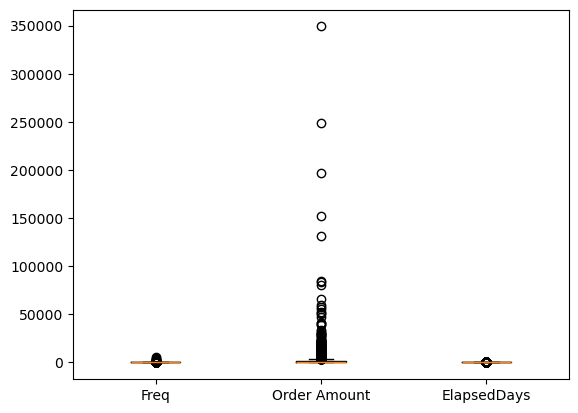

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot([customer_df['Freq'], customer_df['Order Amount'], customer_df['ElapsedDays']], sym='o')
plt.xticks([1,2,3], ['Freq','Order Amount', 'ElapsedDays'])
plt.show()

In [105]:
print(customer_df.describe())

        Customer ID         Freq   Order Amount  ElapsedDays
count   4314.000000  4314.000000    4314.000000  4314.000000
mean   15348.880389    94.505100    2047.288659   367.269819
std     1700.930104   202.020116    8912.523243    96.944304
min    12346.000000     1.000000       0.000000   277.000000
25%    13883.250000    18.000000     307.950000   294.000000
50%    15348.500000    44.000000     705.550000   329.000000
75%    16833.750000   102.000000    1722.802500   412.000000
max    18287.000000  5570.000000  349164.350000   650.000000


In [106]:
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['OrderAmount_log'] = np.log1p(customer_df['Order Amount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

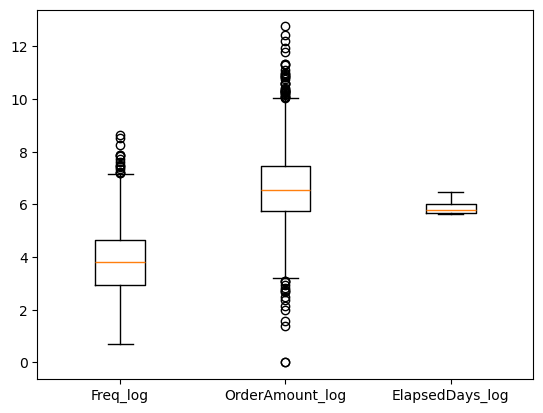

In [107]:
plt.boxplot([customer_df['Freq_log'], customer_df['OrderAmount_log'], customer_df['ElapsedDays_log']], sym='o')
plt.xticks([1,2,3], ['Freq_log','OrderAmount_log', 'ElapsedDays_log'])
plt.show()

#### feature 표준화 스케일링

In [108]:
from sklearn.preprocessing import StandardScaler
scaled_data = customer_df[['Freq_log','OrderAmount_log','ElapsedDays_log']]
scaled_data = StandardScaler().fit_transform(scaled_data)

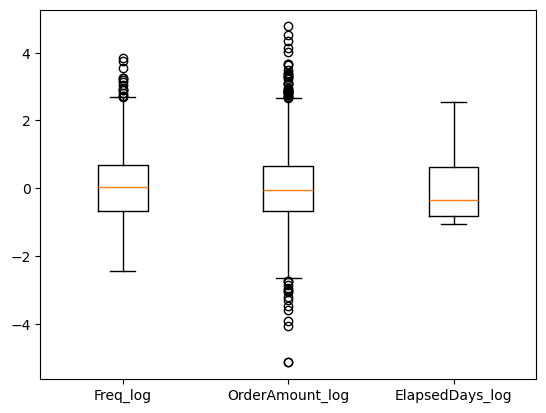

In [109]:
fig, ax = plt.subplots()
ax.boxplot([scaled_data[:,0], scaled_data[:,1], scaled_data[:,2]], sym ='o')
plt.xticks([1,2,3], ['Freq_log','OrderAmount_log','ElapsedDays_log'])
plt.show()

## 최적의 K 찾기

### elbow method 이용

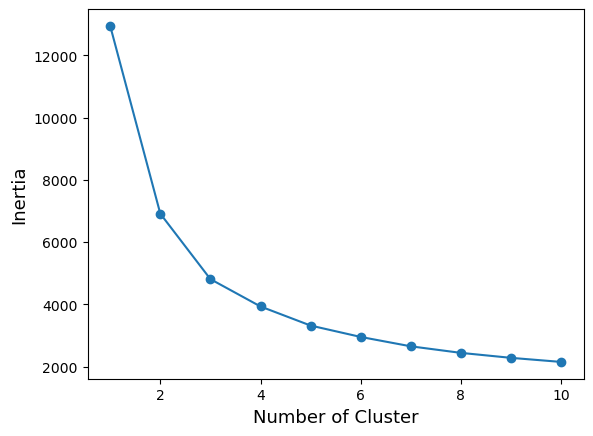

In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_arr = []
k_range = range(1, 11)

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=20)
    kmean.fit(scaled_data)
    inertia = kmean.inertia_
    inertia_arr.append(inertia)

# Elbow Method 그래프 그리기
plt.plot(k_range, inertia_arr, '-o')
plt.xlabel('Number of Cluster', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

### 실루엣 계수 이용

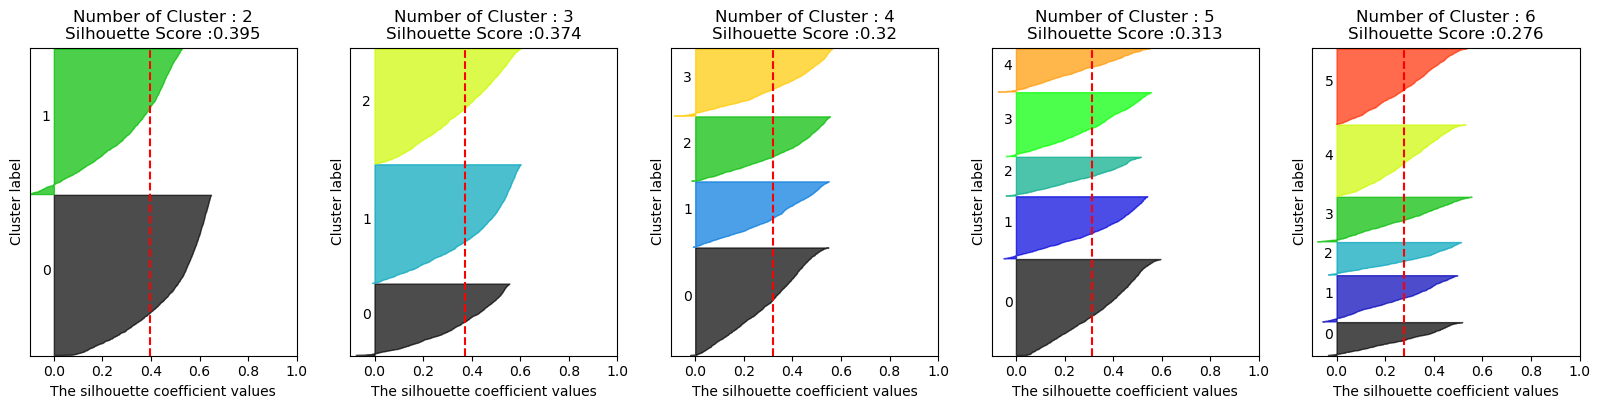

In [111]:
visualize_silhouette([2,3,4,5,6], scaled_data)

### 최적 K를 이용한 군집 분석

In [123]:
print(customer_df.shape)

(4314, 8)


In [126]:
print(cluster_num.shape)

(4314,)


In [127]:
print(cluster_num[:5])

[1 2 0 2 0]


In [112]:
model = KMeans(n_clusters=3)
model.fit(scaled_data)
cluster_num = model.labels_

In [113]:
customer_df['cluster'] = cluster_num
display(customer_df.head())

,Customer ID,Freq,Order Amount,ElapsedDays,Freq_log,OrderAmount_log,ElapsedDays_log,cluster
0,12346,33,372.86,441,3.526361,5.923881,6.091310,1
1,12347,71,1323.32,279,4.276666,7.188654,5.634790,2
2,12348,20,222.16,350,3.044522,5.407889,5.860786,0
3,12349,102,2671.14,319,4.634729,7.890635,5.768321,2
4,12351,21,300.93,287,3.091042,5.710195,5.662960,0


## 군집 결과 의미 해석

### 군집 결과 산점도로 시각화

In [128]:
print(cluster_num[:10])

[1 2 0 2 0 0 0 1 2 2]


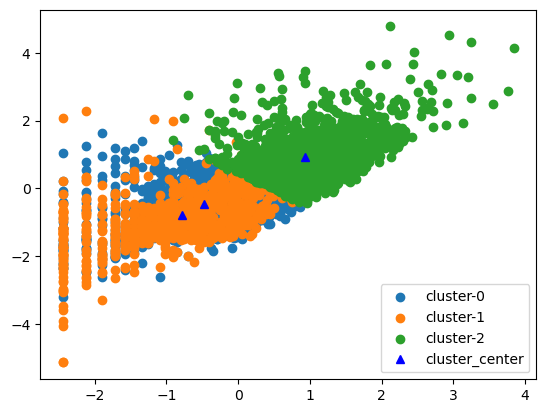

In [114]:
for i in range(3):   # 3: 군집의 개수
    plt.scatter(scaled_data[cluster_num==i,0], scaled_data[cluster_num==i,1], label='cluster-'+str(i))
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'b^', label = 'cluster_center')
plt.legend()
plt.show()

In [115]:
customer_df_cluster = customer_df.drop(['Customer ID', 'Freq_log', 'OrderAmount_log','ElapsedDays_log'], axis=1)

In [118]:
display(customer_df_cluster.head())

,Freq,Order Amount,ElapsedDays,cluster,OrderAmountAvg
0,33,372.86,441,1,11.298788
1,71,1323.32,279,2,18.638310
2,20,222.16,350,0,11.108000
3,102,2671.14,319,2,26.187647
4,21,300.93,287,0,14.330000


In [117]:
# 구매 1회당 평균 구매비용
customer_df_cluster['OrderAmountAvg'] = customer_df_cluster['Order Amount'] / customer_df_cluster['Freq']

In [120]:
group_by_cluster = customer_df_cluster.groupby('cluster')
group_by_cluster['Freq'].count()

cluster
0    1627
1    1010
2    1677
Name: Freq, dtype: int64

In [121]:
print(group_by_cluster.mean())

               Freq  Order Amount  ElapsedDays  OrderAmountAvg
cluster                                                       
0         30.452366    532.085286   327.366933       35.995933
1         23.503960    438.457826   520.046535       51.866412
2        199.409660   4486.260053   313.970781       28.864662
